#  Multi-class Classification


In [7]:
import csv
import requests
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [9]:
#Download the training and test set from the repo or from this drive location
#training : 'https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR'
#validation : 'https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg'
TRAINING_FILE = 'C:/Users/RTiwari1/CV/Multiclass/sign_mnist_train.csv'
VALIDATION_FILE = 'C:/Users/RTiwari1/CV/Multiclass/sign_mnist_test.csv'

In [10]:
with open(TRAINING_FILE) as training_file:
    line = training_file.readline()
    print(f"First line (header) looks like this:\n{line}")
    line = training_file.readline()
    print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

In [11]:
def parse_data_from_input(filename):
    with open(filename) as file:
        csv_reader = csv.reader(file, delimiter=',')

        labels = []
        images = []
        count =0

        for i in csv_reader:
            if count != 0:
                labels.append(i[0])
                images.append(i[1:])
            count = count+1

    labels = np.array(labels).astype(np.float64)
    images = np.array(images).astype(np.float64)
    images = np.reshape(images, (images.shape[0], 28, 28))
    
    return images, labels

In [12]:
# Test your function
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (27455, 28, 28) and dtype: float64
Training labels has shape: (27455,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64


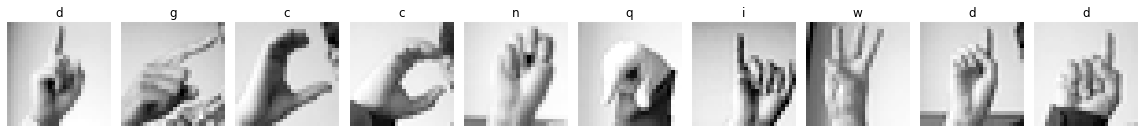

In [13]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(1, 10, figsize=(16, 15))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for k in range(10):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="Greys_r")
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories(training_images, training_labels)

In [14]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(training_images, training_labels, validation_images, validation_labels):

  # Add another dimension to the data to represent color
    training_images = np.expand_dims(training_images, axis=3)
    validation_images = np.expand_dims(validation_images, axis=3)

    # Instantiate the ImageDataGenerator class 
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32) 


    validation_datagen = ImageDataGenerator(rescale = 1./255)
    validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32) 

    return train_generator, validation_generator

In [15]:
# Test your generators
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


In [16]:
def create_model():

    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(514, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])
  

    model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'adam',
                metrics=['accuracy'])
  
    return model

In [17]:
model = create_model()
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
858/858 [==============================] - 19s 22ms/step - loss: 0.6072 - accuracy: 0.8222 - val_loss: 0.3288 - val_accuracy: 0.8940
Epoch 2/15
858/858 [==============================] - 19s 22ms/step - loss: 0.0343 - accuracy: 0.9916 - val_loss: 0.3087 - val_accuracy: 0.9134
Epoch 3/15
858/858 [==============================] - 19s 22ms/step - loss: 0.0204 - accuracy: 0.9944 - val_loss: 0.3563 - val_accuracy: 0.9189
Epoch 4/15
858/858 [==============================] - 18s 21ms/step - loss: 0.0180 - accuracy: 0.9948 - val_loss: 0.3117 - val_accuracy: 0.9300
Epoch 5/15
858/858 [==============================] - 19s 22ms/step - loss: 0.0065 - accuracy: 0.9984 - val_loss: 0.2578 - val_accuracy: 0.9505
Epoch 6/15
858/858 [==============================] - 20s 23ms/step - loss: 0.0135 - accuracy: 0.9965 - val_loss: 0.3698 - val_accuracy: 0.9407
Epoch 7/15
858/858 [==============================] - 20s 23ms/step - loss: 9.0197e-04 - accuracy: 0.9998 - val_loss: 0.3699 - val_accur

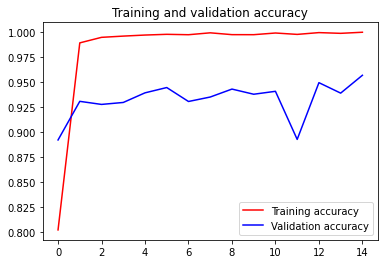

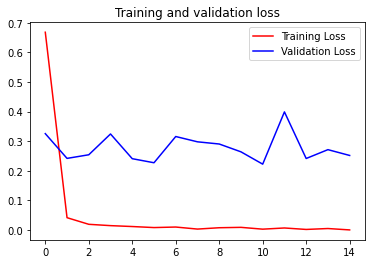

In [34]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()